In [1]:
import qiskit as q 
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
#style.use("dark_background")
%matplotlib inline

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")


def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
                     
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

    

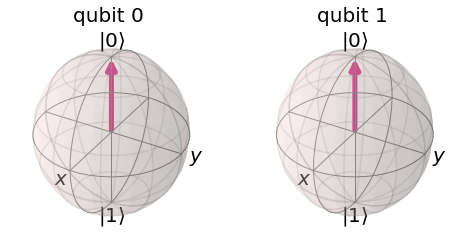

In [2]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

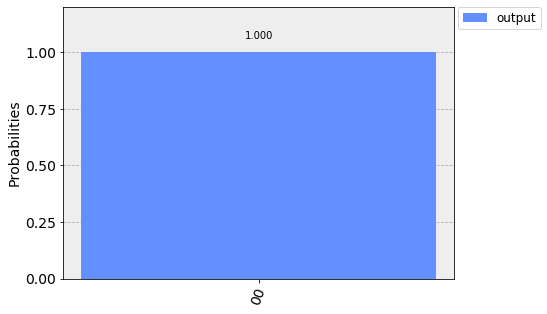

In [3]:
plot_histogram([counts], legend=["output"])

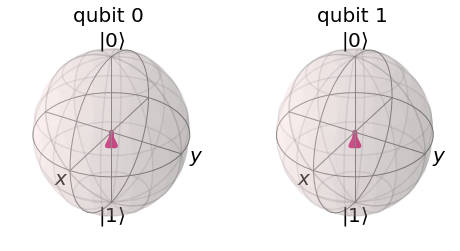

In [4]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0) # first qubit
circuit.cx(0, 1) # second qubit
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

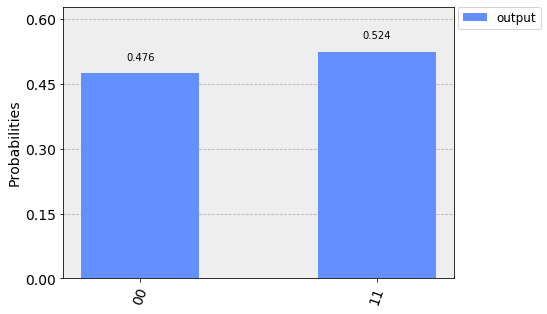

In [5]:
plot_histogram([counts], legend=["output"])

In [9]:
circuit = q.QuantumCircuit(3, 3)
circuit.h(0) # first qubit
circuit.h(1)
circuit.ccx(0, 1, 2) # second qubit
circuit.draw()

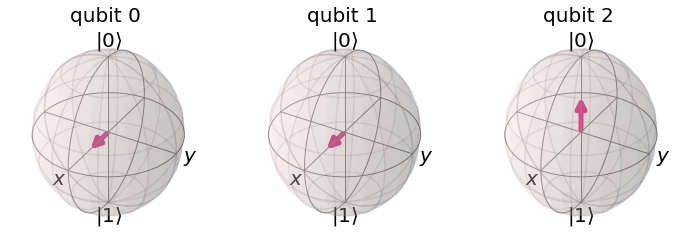

In [10]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

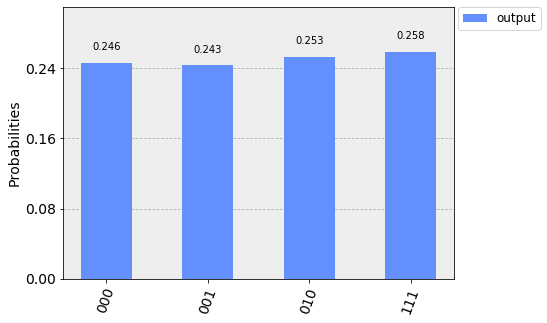

In [11]:
plot_histogram([counts], legend=["output"])

In [14]:
circuit = q.QuantumCircuit(3, 1)
circuit.h(0) # first qubit
circuit.h(1)
circuit.ccx(0, 1, 2) # second qubit
circuit.measure([2], [0])
circuit.draw()

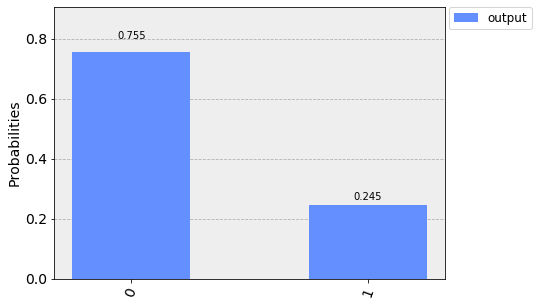

In [15]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=["output"])

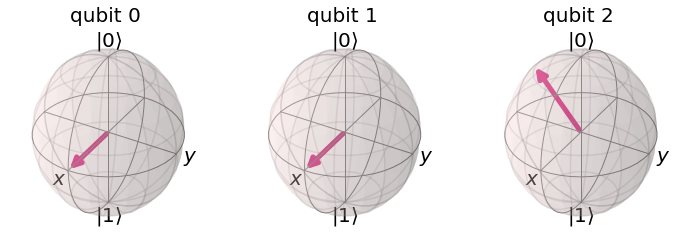

In [24]:
import math
circuit = q.QuantumCircuit(3, 3)
circuit.h(0) # first qubit
circuit.h(1)
circuit.rx(math.pi/4, 2)
#circuit.x(2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

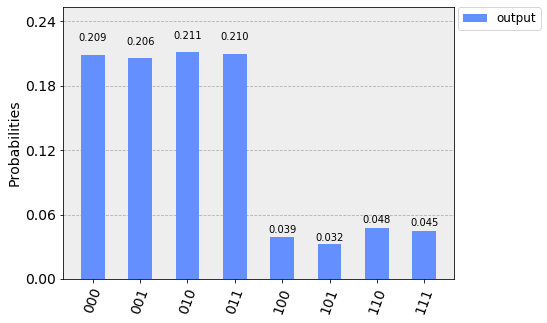

In [25]:
plot_histogram([counts], legend=["output"])

In [26]:
circuit = q.QuantumCircuit(3, 1)
circuit.h(0) # first qubit
circuit.h(1)
circuit.rx(math.pi/4, 2)
circuit.measure([2], [0])
circuit.draw()

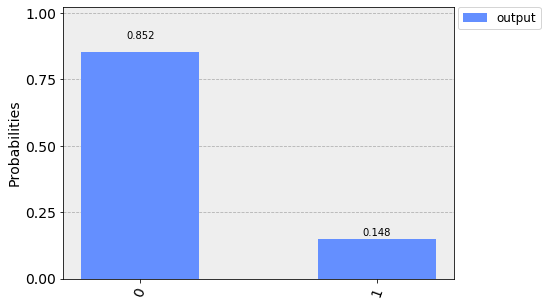

In [27]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=["output"])